Euler Solucion cuando x = 0.100  es  4.025
Euler Solucion cuando x = 0.200  es  4.050
Euler Solucion cuando x = 0.300  es  4.073
Euler Solucion cuando x = 0.400  es  4.096
Euler Solucion cuando x = 0.500  es  4.116
Euler Solucion cuando x = 0.600  es  4.135
Euler Solucion cuando x = 0.700  es  4.152
Euler Solucion cuando x = 0.800  es  4.166
Euler Solucion cuando x = 0.900  es  4.177
Euler Solucion cuando x = 1.000  es  4.187
Euler Solucion cuando x = 1.100  es  4.194
Euler Solucion cuando x = 1.200  es  4.198
Euler Solucion cuando x = 1.300  es  4.202
Euler Solucion cuando x = 1.400  es  4.203
Euler Solucion cuando x = 1.500  es  4.204
Euler Solucion cuando x = 1.600  es  4.204
Euler Solucion cuando x = 1.700  es  4.204
Euler Solucion cuando x = 1.800  es  4.205
Euler Solucion cuando x = 1.900  es  4.206
Euler Solucion cuando x = 2.000  es  4.208
Euler Solucion cuando x = 2.100  es  4.212
Euler Solucion cuando x = 2.200  es  4.218
Euler Solucion cuando x = 2.300  es  4.227
Euler Soluc

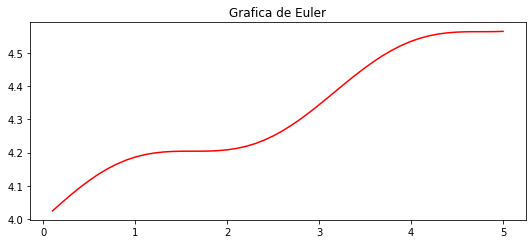

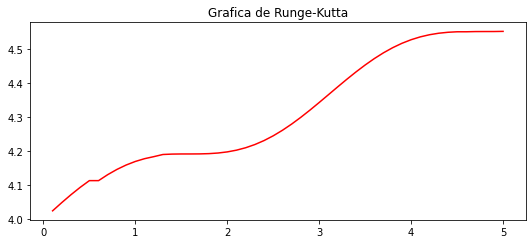

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy

def Euler(x0, y0, dt, xf):
    xImpresion = []
    yImpresion = []

    # dy / dx =(x + y + xy)
    def func(x, y):
        return (np.cos(x)**2)/(y)

    # Function de la formula de Euler
    def euler(x0, y, h, x):
        temp = -0

        # Iteracion hasta la proxima aproximacion
        while x0 < x:
            temp = y
            y = y + h * func(x0, y)
            x0 = x0 + h

        # Impresion
        print("Euler Solucion cuando x = %.3f" % x0, " es ", "%.3f" % y)

        # Guardado en arrays para el graficado
        xImpresion.append(x0)
        yImpresion.append(y)

    xtemp = x0 + dt
    while xtemp <= xf:
        euler(x0, y0, dt, xtemp)
        xtemp += dt

    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.title("Grafica de Euler")
    plt.plot(xImpresion, yImpresion, color="red")
    plt.show()

    # Kutta

def Kutta(x0, y, h, xfinal):
    xImpresion = []
    yImpresion = []

    # A sample differential equation "dy / dx = (x - y)/2"
    def dydx(x, y):
        return (np.cos(x)**2)/(y)

    def rungeKutta(x0, y0, x, h):

        n = (int)((x - x0) / h)
        # Iterar
        y = y0
        for i in range(1, n + 1):
            k1 = h * dydx(x0, y)
            k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1)
            k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2)
            k4 = h * dydx(x0 + h, y + k3)

            # Actualizar el valor de y
            y = y + (1.0 / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

            # Actualizar el valor de x
            x0 = x0 + h
        print("Kuttaaa Solucion cuando x = %.3f" % x, " es ", "%.3f" % y)
        # Guardado en arrays para el graficado
        xImpresion.append(x)
        yImpresion.append(y)



    xtemp = x0 + h
    while xtemp <= xfinal:
        rungeKutta(x0, y, xtemp, h)
        xtemp += h

    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.title("Grafica de Runge-Kutta")
    plt.plot(xImpresion, yImpresion, color="red")
    plt.show()


def M(b_1, c_1, arr, Te, F):
    b = b_1
    c = c_1
    rx = F
    x, y = sympy.symbols('x,y')
    xvec = np.arange(0, arr + Te, Te) 
    matriz = np.zeros((len(xvec), len(xvec)))
    vfe = []
    a1 = (b / 2) + ((c * Te) / 3)
    a2 = (b / 2) + ((c * Te) / 6)

    for i in range(0, len(xvec)):
        for j in range(0, len(xvec)):
            if (j == i):
                if ((i == 0 and j == 0) or (i == (len(xvec) - 1) and (j == len(xvec) - 1))):
                    matriz[i][j] = a1
                else:
                    matriz[i][j] = 2 * a1
            elif ((j - i == 1) or (i - j == 1)):
                matriz[i][j] = a2
    for j in xvec:
        if (j == 0 or j == arr):
            vfe.append(-((rx.evalf(subs={x: j})) / 2))
        else:
            vfe.append(-(rx.evalf(subs={x: j})))

    a_inv = np.linalg.inv(matriz)
    vx = np.dot(a_inv, vfe)
    plt.plot(xvec, vx, color= 'blue')
    plt.grid()
    plt.show()


x= sympy.symbols('x')
Euler(0,4,0.1,5)
Kutta(0,4,0.1,5)
#M(9,8,5,0.01,7*(sympy.cos(x)**2))